## Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Load the dataset

In [2]:
df = pd.read_csv("C:/Users/SURAJ/Downloads/financial_fraud_dataset.csv")

In [3]:
df.head()

,Transaction_ID,Amount,Transaction_Type,Location,Time_of_Day,Account_Age_Months,Is_International,Fraud
0,1,1875.827894,ATM,Germany,Night,113,0,0
1,2,4753.817961,Bank Transfer,Germany,Night,30,1,0
2,3,3661.309739,ATM,UK,Evening,67,1,0
3,4,2995.299129,Bank Transfer,Canada,Night,220,0,1
4,5,784.313109,Bank Transfer,USA,Morning,161,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      5000 non-null   int64  
 1   Amount              5000 non-null   float64
 2   Transaction_Type    5000 non-null   object 
 3   Location            5000 non-null   object 
 4   Time_of_Day         5000 non-null   object 
 5   Account_Age_Months  5000 non-null   int64  
 6   Is_International    5000 non-null   int64  
 7   Fraud               5000 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 312.6+ KB


In [5]:
df.shape

(5000, 8)

In [6]:
df.describe()

,Transaction_ID,Amount,Account_Age_Months,Is_International,Fraud
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,2486.675795,120.562200,0.503800,0.05160
std,1443.520003,1446.720087,69.013378,0.500036,0.22124
min,1.000000,5.058116,1.000000,0.000000,0.00000
25%,1250.750000,1223.094719,61.000000,0.000000,0.00000
50%,2500.500000,2502.543085,120.000000,1.000000,0.00000
75%,3750.250000,3741.763809,181.000000,1.000000,0.00000
max,5000.000000,4998.589778,239.000000,1.000000,1.00000


## Exploratory Data Analysis

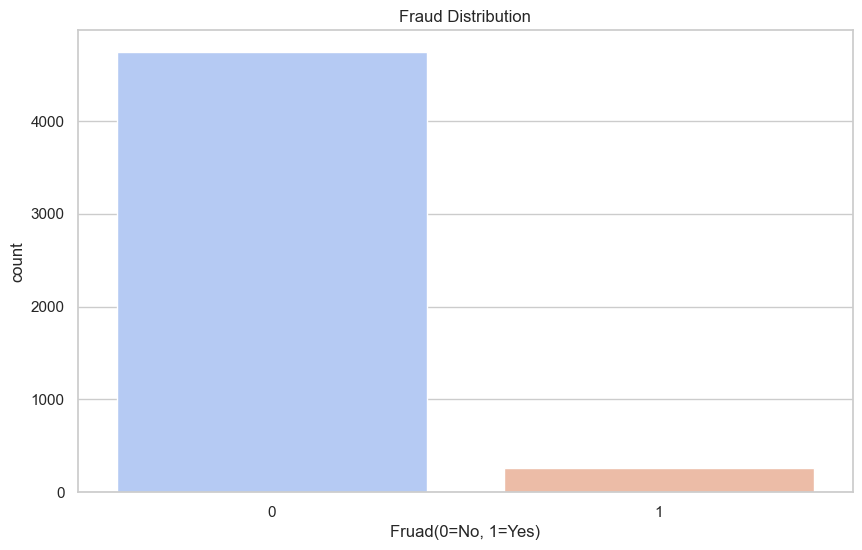

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.countplot(x=df["Fraud"], palette="coolwarm")
plt.title("Fraud Distribution")
plt.xlabel("Fruad(0=No, 1=Yes)")
plt.ylabel("count")
plt.show()

## Data Visualization

### 1. Fraud Distribution

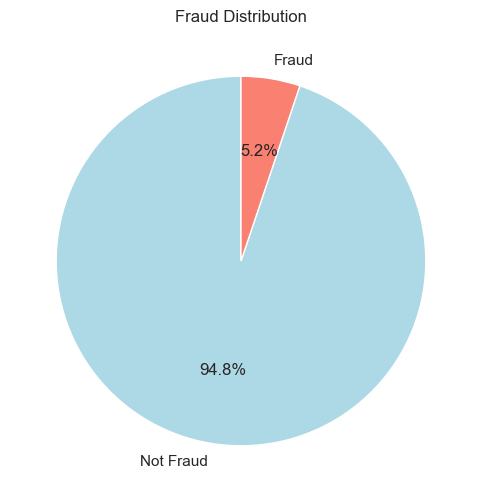

In [8]:
plt.figure(figsize=(6,6))

df["Fraud"].value_counts().plot.pie(autopct="%.1f%%", labels=["Not Fraud","Fraud"], colors=['lightblue','salmon'], startangle=90)

plt.title("Fraud Distribution")
plt.ylabel("")
plt.show()

### 2. Transaction amount Distribution

C:\Users\SURAJ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

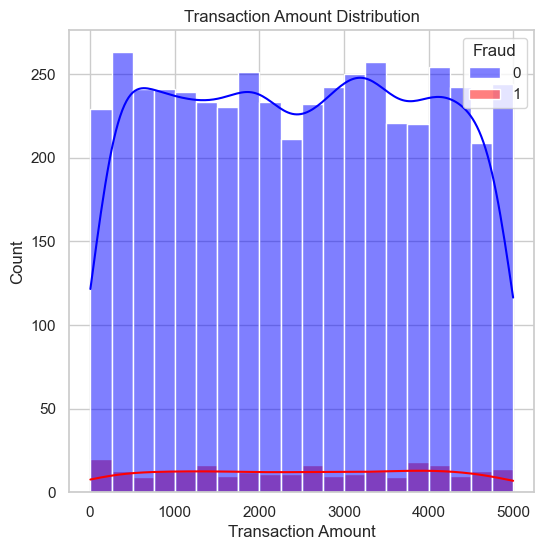

In [9]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x="Amount", hue="Fraud", bins=20, kde=True, palette=['blue','red'])
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")

### 3. Fraud by Transaction Type

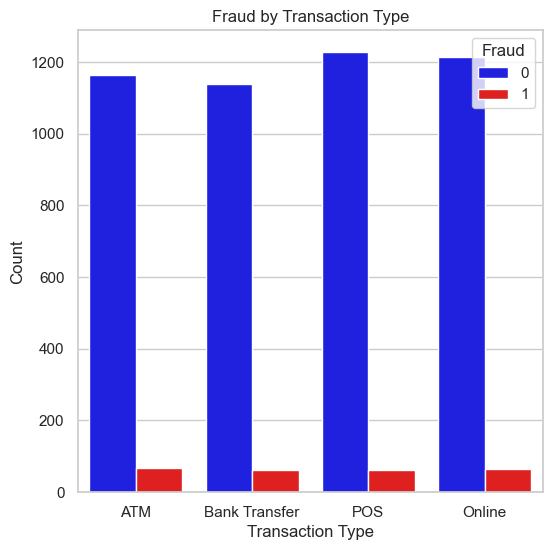

In [10]:
plt.figure(figsize=(6,6))

sns.countplot(data=df, x="Transaction_Type", hue=df["Fraud"].astype(str), palette=['blue','red'])

plt.title("Fraud by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

plt.show()

### 4. Fraud by Time of Day

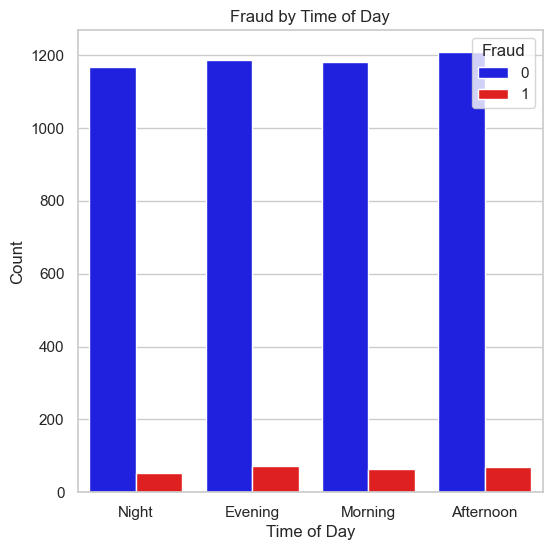

In [11]:
plt.figure(figsize=(6,6))

sns.countplot(data=df, x="Time_of_Day", hue=df["Fraud"].astype(str), palette=['blue','red'])

plt.title("Fraud by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")

plt.show()

### 5. Fraud by Location

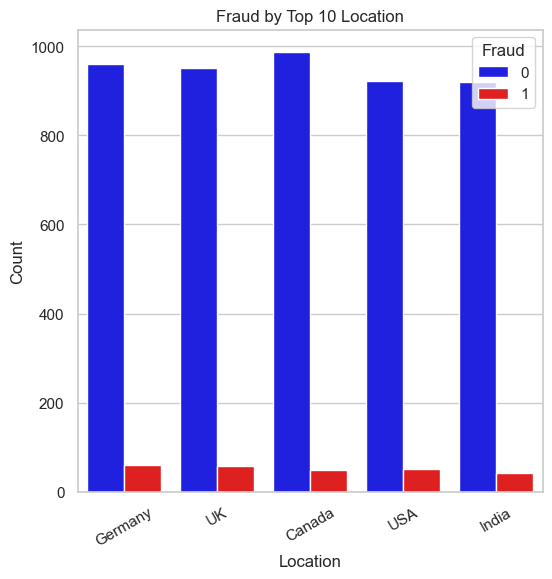

In [12]:
top_location = df['Location'].value_counts().index[:10]

plt.figure(figsize=(6,6))
sns.countplot(data=df[df['Location'].isin(top_location)], x="Location", hue=df["Fraud"].astype(str), palette=['blue','red'])

plt.title("Fraud by Top 10 Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=30)

plt.show()

### 6. Account Age vs Fraud Cases

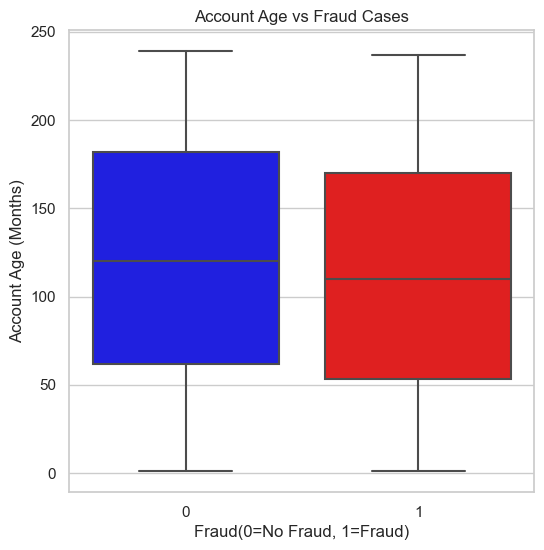

In [13]:
plt.figure(figsize=(6,6))

sns.boxplot(data=df, x="Fraud", y="Account_Age_Months", palette=['blue','red'])

plt.title("Account Age vs Fraud Cases")
plt.xlabel("Fraud(0=No Fraud, 1=Fraud)")
plt.ylabel("Account Age (Months)")

plt.show()

### 7. International Transaction & Fraud

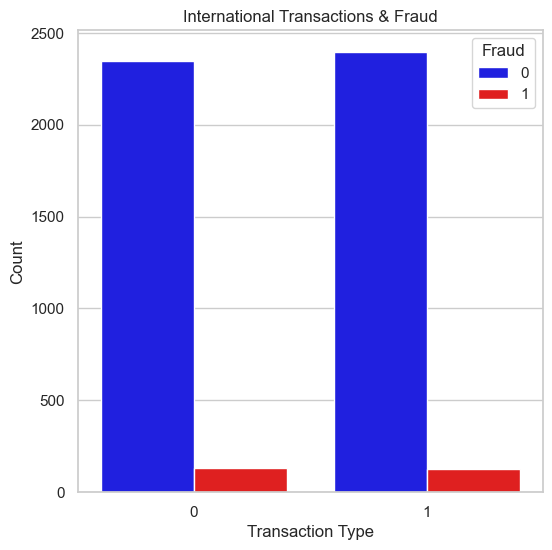

In [14]:
plt.figure(figsize=(6,6))

sns.countplot(data=df, x="Is_International", hue=df["Fraud"].astype(str), palette=['blue','red'])

plt.title("International Transactions & Fraud")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

plt.show()

## Machine Learning Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df.drop(columns=["Transaction_ID"], inplace=True)

label_encoders = {}
for col in ["Transaction_Type","Location","Time_of_Day"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    
X = df.drop(columns=['Fraud'])
y = df['Fraud']

scaler = StandardScaler()
X[["Amount", "Account_Age_Months"]] = scaler.fit_transform(X[["Amount", "Account_Age_Months"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.head()

,Amount,Transaction_Type,Location,Time_of_Day,Account_Age_Months,Is_International
12,1.158858,1,3,0,0.948285,0
3369,0.683031,2,4,2,-0.486363,0
4145,0.528155,3,0,2,0.513543,0
4580,1.511412,2,4,0,-1.645675,1
2401,-1.467932,0,4,2,0.614983,1


### 1. Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression()

In [17]:
log_reg

LogisticRegression()

In [18]:
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_log)
report_logistic = classification_report(y_test, y_pred_log)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_log)

print("Logistic Regression Accuracy:\n", accuracy_logistic)
print("Classification Report:\n", report_logistic)
print("Confusion Matrix:\n", conf_matrix_logistic)

Logistic Regression Accuracy:
 0.948
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       948
           1       0.00      0.00      0.00        52

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.92      1000

Confusion Matrix:
 [[948   0]
 [ 52   0]]


C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2. Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", class_weight="balanced")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:\n", accuracy_svm)
print("Classification Report:\n", report_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

SVM Accuracy:
 0.577
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.59      0.72       948
           1       0.05      0.38      0.09        52

    accuracy                           0.58      1000
   macro avg       0.50      0.49      0.41      1000
weighted avg       0.90      0.58      0.69      1000

Confusion Matrix:
 [[557 391]
 [ 32  20]]


### 3. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [21]:
dt_model

DecisionTreeClassifier()

In [22]:
dt_model = DecisionTreeClassifier(class_weight="balanced",random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Accuracy:\n", accuracy_dt)
print("Classification Report:\n", report_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

Decision Accuracy:
 0.917
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       948
           1       0.06      0.04      0.05        52

    accuracy                           0.92      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.90      0.92      0.91      1000

Confusion Matrix:
 [[915  33]
 [ 50   2]]


### 4. Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model

RandomForestClassifier()

In [24]:
rf_model = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Accuracy:\n", accuracy_rf)
print("Random Classification:\n", report_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Random Accuracy:
 0.948
Random Classification:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       948
           1       0.00      0.00      0.00        52

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.92      1000

Confusion Matrix:
 [[948   0]
 [ 52   0]]


C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SURAJ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## To improve fraud detection
## Use SMOTE

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

pd.Series(y_resampled).value_counts()

Fraud
0    3794
1    3794
Name: count, dtype: int64